In [1]:
# -*- coding: utf-8 -*-
import numpy as np

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H1, H2, D_out = 1, 1, 64, 64, 1

# # Create random input and output data
# x = np.random.randn(N, D_in)
# y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H1)
w2 = np.random.randn(H1, H2)
w3 = np.random.randn(H2, D_out)

mean_text = input("Enter Mean:")
mean = float(mean_text)

standard_deviation_text = input("Enter Standard Deviation:")
standard_deviation = float(standard_deviation_text)

learning_rate = 0.1
n_samples = 1000
epochs = 20

X = np.random.uniform(mean - 2*standard_deviation, mean + 2*standard_deviation,(1000,1))
Y = (1/(standard_deviation*np.sqrt(2*np.pi))) * np.exp(-0.5*np.square((X - mean)/standard_deviation))

X_train = []
Y_train = []
X_test = []
Y_test = []

for i in range(n_samples):
    if i % 10 == 0:
        X_test.append(X[i])
        Y_test.append(Y[i])
    else:
        X_train.append(X[i])
        Y_train.append(Y[i])

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
x = X_train
y = Y_train


for t in range(epochs):
    # Forward pass: compute predicted y
    h1 = x.dot(w1)
    h1_relu = np.maximum(h1, 0)
    h2 = h1_relu.dot(w2)
    h2_relu = np.maximum(h2, 0)
    y_pred = h2_relu.dot(w3)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t+1, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w3 = h2_relu.T.dot(grad_y_pred)
    grad_h2_relu = grad_y_pred.dot(w3.T)
    grad_h2 = grad_h2_relu.copy()
    grad_h2[h2 < 0] = 0
    grad_w2 = h1_relu.T.dot(grad_h2)
    grad_h1_relu = grad_h2.dot(w2.T)
    grad_h1 = grad_h1_relu.copy()
    grad_h1[h1<0] = 0
    grad_w1 = x.T.dot(grad_h1)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    w3 -= learning_rate * grad_w3

Enter Mean:0
Enter Standard Deviation:1
1 346604.88511140953
2 3.7512589884167563e+30
3 2.355739747958939e+149
4 66.50578293309945
5 66.50578293309945
6 66.50578293309945
7 66.50578293309945
8 66.50578293309945
9 66.50578293309945
10 66.50578293309945
11 66.50578293309945
12 66.50578293309945
13 66.50578293309945
14 66.50578293309945
15 66.50578293309945
16 66.50578293309945
17 66.50578293309945
18 66.50578293309945
19 66.50578293309945
20 66.50578293309945


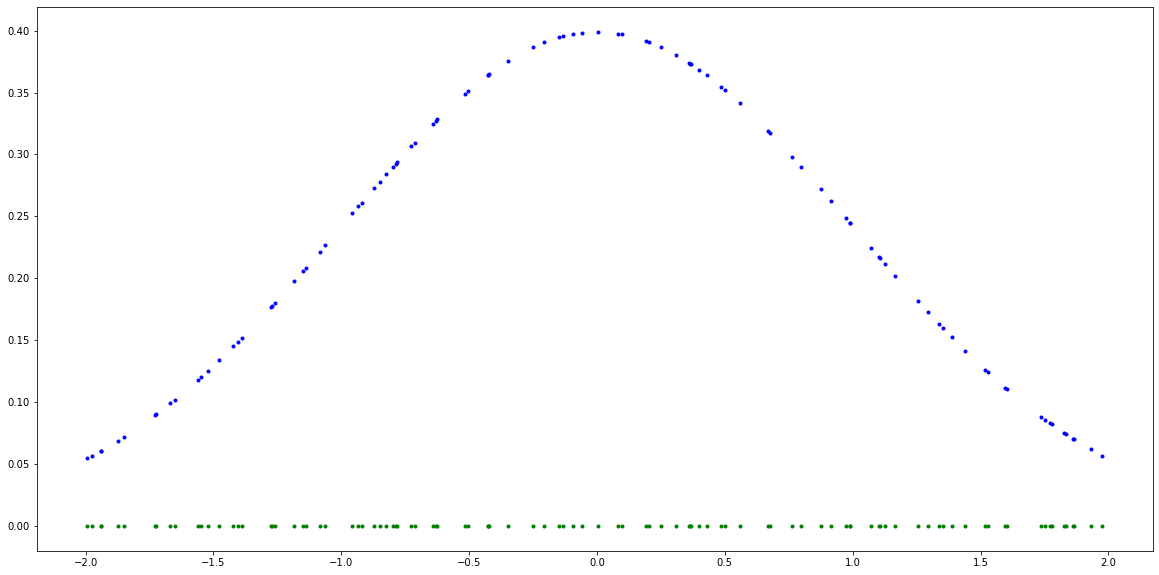

In [5]:
import matplotlib.pyplot as plt

x = X_test
h1 = x.dot(w1)
h1_relu = np.maximum(h1, 0)
h2 = h1_relu.dot(w2)
h2_relu = np.maximum(h2, 0)
y_pred = h2_relu.dot(w3)

plt.figure(figsize=(20,10))
plt.plot(X_test,Y_test,'b.')
plt.plot(X_test,y_pred,'g.')